## Intro:
We got employee data from a few companies. We have data about all employees who joined from 2011/01/24 to 2015/12/13. For each employee, we also know if they are still at the company as of 2015/12/13 or they have quit. Beside that, we have general info about the employee, such as avg salary during her tenure, dept, and yrs of experience.

As said above, the goal is to predict employee retention and understand its main drivers. Specifically, you should:


## Tasks:
- Assume, for each company, that the headcount starts from zero on 2011/01/23. Estimate employee headcount, for each company on each day, from 2011/01/24 to 2015/12/13. That is, if by 2012/03/02 2000 people have joined company 1 and 1000 of them have already quit, then company headcount on 2012/03/02 for company 1 would be 1000. You should create a table with 3 columns: day, employee_headcount, company_id


- What are the main factors that drive employee churn? Do they make sense? Explain your findings


- If you could add to this data set just one variable that could help explain employee churn, what would that be?

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.width', 350)

data = pd.read_csv('https://drive.google.com/uc?export=download&id=1_5RXUSwsvEjh0_DelLhHa8znq_Q4_7uc')
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


### Task 1:
Assume, for each company, that the headcount starts from zero on 2011/01/23. Estimate employee headcount, for each company on each day, from 2011/01/24 to 2015/12/13. That is, if by 2012/03/02 2000 people have joined company 1 and 1000 of them have already quit, then company headcount on 2012/03/02 for company 1 would be 1000. You should create a table with 3 columns: day, employee_headcount, company_id

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
employee_id    24702 non-null float64
company_id     24702 non-null int64
dept           24702 non-null object
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null object
quit_date      13510 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ MB


In [4]:
data.describe()

,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


In [5]:
data[data['seniority'] > 60]

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
24700,97289.0,10,engineer,98,266000.0,2011-12-13,2015-01-09
24701,604052.0,1,marketing,99,185000.0,2011-07-26,2013-12-06


In [7]:
data['join_date'] = pd.to_datetime(data['join_date'])
data['quit_date'] = pd.to_datetime(data['quit_date'])

In [9]:
datelist = pd.date_range(start = "2011/01/24", end = '2015/12/13').tolist()
datelist[1]

Timestamp('2011-01-25 00:00:00', freq='D')

In [42]:
company_list.sort()
company_list

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [15]:
company_list = data['company_id'].unique()
head_count = []
company_loop = []
date_loop = []

for company in company_list:
    for date in datelist:
        head_count.append(len(data[(data['join_date'] <= date) & (data['company_id'] == company)]) - len(data[(data['quit_date'] <= date) & (data['company_id'] == company)]))
        company_loop.append(company)
        date_loop.append(date)
        


In [20]:
headcount_table = {'company_id':company_loop, 'date': date_loop, 'headcount': head_count}
headcount_table = pd.DataFrame(headcount_table)
headcount_table.sample(50)

,company_id,date,headcount
4193,2,2012-10-08,1303
2631,4,2013-05-19,725
10680,6,2015-11-14,570
16022,3,2015-11-01,1201
20304,12,2012-11-23,5
3218,4,2014-12-27,920
8791,1,2015-08-02,3809
5104,2,2015-04-07,1967
4201,2,2012-10-16,1306
3082,4,2014-08-13,899


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# # visualization headcounts

# fig, ax = plt.subplots(figsize=(10, 6))

# for company in (company_list):
#         sns.(data[data['video_language'] == language]['video_length'], ax=ax, hist_kws=hist_kws, 
#                      label = language, bins = 50, kde = False)

# ax.legend()
# plt.tight_layout()
# plt.show()

Text(0.5, 1.0, 'headcount change')

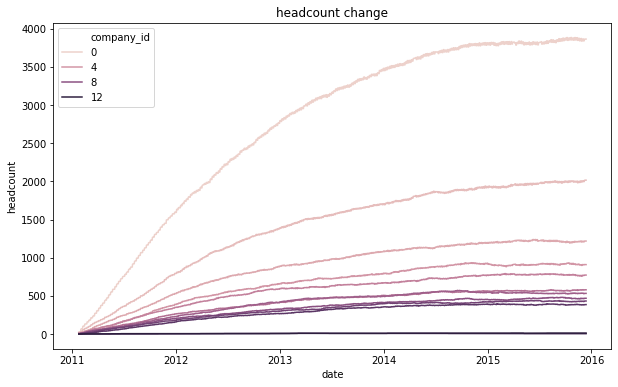

In [49]:
# headcount_table1 = headcount_table.copy()
# headcount_table1['company_id'] = headcount_table1['company_id'].astype(str)

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x= 'date', y = 'headcount', hue = 'company_id', data = headcount_table, ax= ax)
ax.set_title('headcount change')

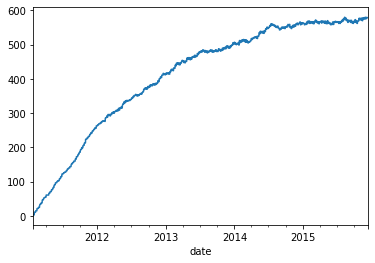

In [28]:

headcount_table[headcount_table['company_id']  == 6].groupby('date')['headcount'].sum().plot()


### Task 2:
What are the main factors that drive employee churn? Do they make sense? Explain your findings

In [50]:
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [51]:
data.isnull().sum()

employee_id        0
company_id         0
dept               0
seniority          0
salary             0
join_date          0
quit_date      11192
dtype: int64

In [53]:
#add new col
data['employment_length'] = (data['quit_date'] - data['join_date']).astype('timedelta64[D]')
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,employment_length
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040.0


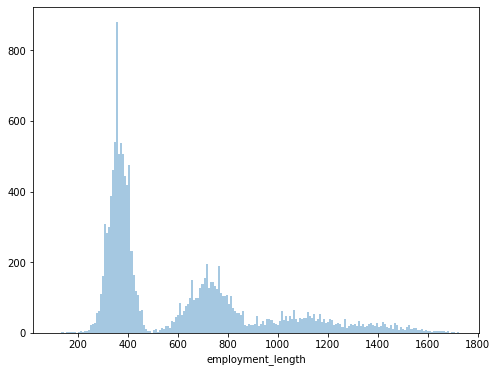

In [68]:
fig, ax = plt.subplots(figsize = (8,6))

hist_kws = {'histtype': 'bar'}
sns.distplot(data['employment_length'], hist_kws = hist_kws, bins = 200,kde=False, ax = ax)

In [73]:
#only keep people who has been employed for at least a year
data = data[data['join_date'] < '2014/12/13']
max(data['join_date'])

Timestamp('2014-12-11 00:00:00')

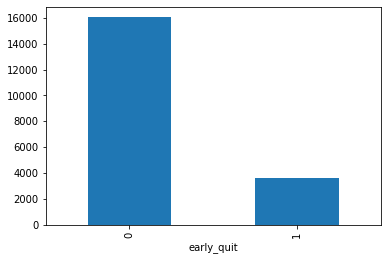

In [78]:
data['early_quit'] = np.where(data['employment_length'] < 366, 1, 0 )
data.groupby('early_quit').size().plot.bar()

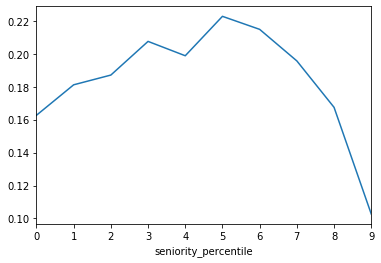

In [94]:
data['seniority_percentile'] = pd.qcut(data['salary'], q = 10, labels = False)
data.groupby('seniority_percentile')['early_quit'].mean().plot()

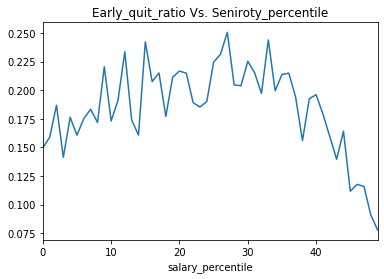

In [99]:
data['salary_percentile'] = pd.qcut(data['salary'], q = 50, labels = False)
data.groupby('salary_percentile')['early_quit'].mean().plot(title = 'Early_quit_ratio Vs. Seniroty_percentile')

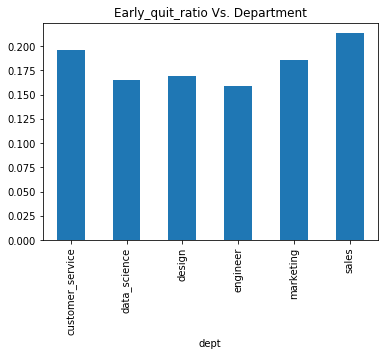

In [100]:
data.groupby('dept')['early_quit'].mean().plot.bar(title = 'Early_quit_ratio Vs. Department')

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19661 entries, 0 to 24701
Data columns (total 9 columns):
employee_id          19661 non-null float64
company_id           19661 non-null int64
dept                 19661 non-null object
seniority            19661 non-null int64
salary               19661 non-null float64
join_date            19661 non-null datetime64[ns]
quit_date            13426 non-null datetime64[ns]
employment_length    13426 non-null float64
early_quit           19661 non-null int64
dtypes: datetime64[ns](2), float64(3), int64(3), object(1)
memory usage: 1.5+ MB


In [89]:
df_mdl.isnull().sum()

company_id              0
dept                    0
seniority               0
salary                  0
employment_length    6235
early_quit              0
dtype: int64

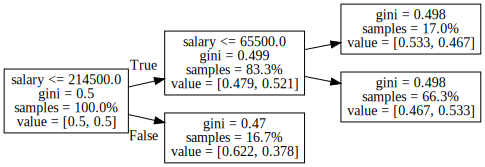

In [103]:
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
  
#make date as string, so few dates that makes sense to have them as few dummy values  
df_mdl = data.drop(columns= ['join_date', 'quit_date', 'employee_id', 'employment_length'])
  
#make dummy vars. Don't drop one level here, keep them all. You don't want to risk dropping the one level that actually creates problems with the randomization
data_dummy = pd.get_dummies(df_mdl)

  
tree=DecisionTreeClassifier(max_depth = 3,
    #change weights. Our data set is now perfectly balanced. It makes easier to understand the tree output
    class_weight="balanced",
    #only split if if it's worthwhile. The default value of 0 means always split no matter what if you can increase overall performance, which creates tons of noisy and irrelevant splits
    min_impurity_decrease = 0.001
    )

train_cols = data_dummy.drop(columns =['early_quit'])
tree.fit(train_cols, data_dummy['early_quit'])
  
export_graphviz(tree, out_file="tree_test.dot", feature_names=train_cols.columns, proportion=True, rotate=True)
with open("tree_test.dot") as f:
    dot_graph = f.read()
  
s = Source.from_file("tree_test.dot")
s